# INFOMAÇÕES DO CONJUNTO DE DADOS
- 1 - Age: idade do paciente
- 2 - Sex: sexo do paciente [M: Masculino, F: Feminino]
- 3 - ChestPaintType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]
- 4 - ResgingBP: pressão arterial em repouso [mm Hg]
- 5 - Cholesterol: colestorol sérico [mm/dl]
- 6 - FastingBS: glicemia em jejum [1: se BS em jejum > 120mg/dl, 0:caso contrario]
- 7 - ResgingECG: resultados dos eletrocardiograma em repouso [Normal: normal, ST: com anomalias das ondas ST-T(inversões das ondas T e/ou elevação ou depressão de ST > 0,5 mV), HVE: mostrando hipertrofia ventricular esquerda provavel ou definitiva pelos critérios do teste]
- 8 - MaxHR: frequencia cardiaca maxima alcançada [Valor numerico entre 60 e 202]
- 9 - ExercicioAngina: angina induzida por exercicio [Y:sim, N/não]
- 10 - Oldpeak: oldpeak = ST [ Valor numerico medido na depressão]
- 11 - ST_Slope: a inclinação do segmento ST do pico do exercicio [Up: subida, Flat: flat, Down: downsloping]
- 12 - HeartDisease: classe de saida [1: doença cardiaca, 0: normal]**#variavel TARGET** (alvo)

In [1]:
# import de bibliotecas
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time



In [2]:
#!pip install imblearn

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_original = pd.read_csv('data\heart.csv', )#carregando base de dados

In [5]:
df_original.head()#verificando as primeiras linhas do dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [6]:
df_original.shape##verificando as dimensões do arquivo

(918, 12)

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df_original.isnull().sum()#verificando se existe valores vazios(nulos)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Verificando valores unicos de cada variavel
valores_unicos = []
for i in df_original.columns[0:12].tolist():
    print(i,':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [10]:
df_original.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [11]:
df_original.groupby(['Sex']).size()

Sex
F    193
M    725
dtype: int64

<Axes: title={'center': 'Sex'}, ylabel='count'>

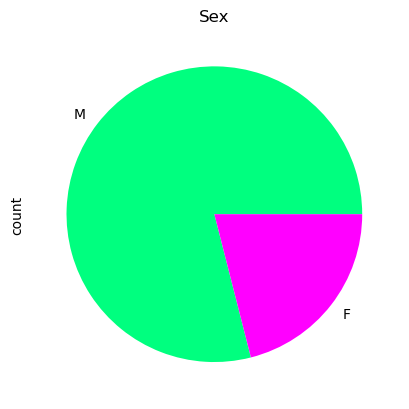

In [12]:
#Visualização atraves de grafico
df_original.Sex.value_counts().plot(kind='pie',title='Sex', colors= ['#00FF7F','#FF00FF'])

<Axes: title={'center': 'ChestPainType'}, xlabel='ChestPainType'>

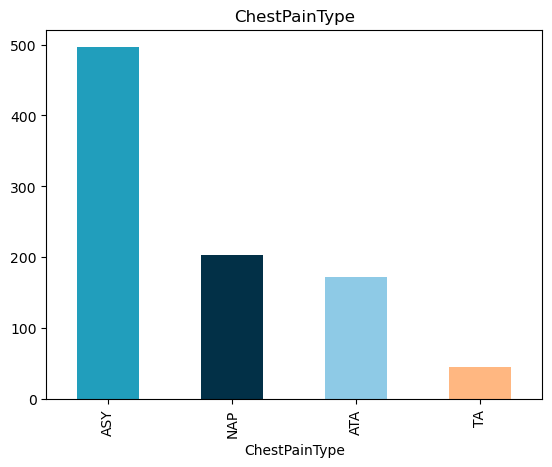

In [13]:
df_original.ChestPainType.value_counts().plot(kind='bar',title='ChestPainType', color=['#219ebc','#023047','#8ecae6','#ffb781'])

<Axes: title={'center': 'HeartDisease'}, xlabel='HeartDisease'>

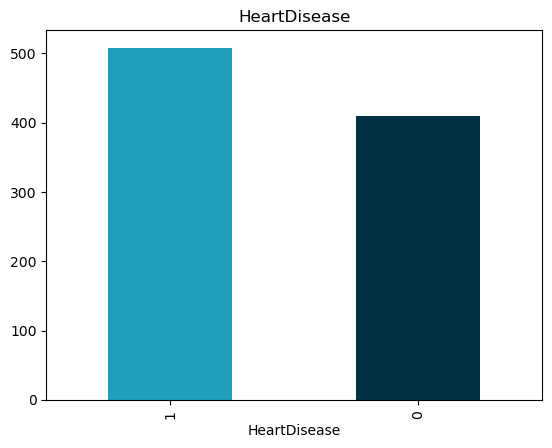

In [14]:
df_original.HeartDisease.value_counts().plot(kind='bar',title='HeartDisease', color=['#219ebc','#023047'])#Visualizando a variavel alvo
#Nota-se que precisa fazer um balanceamento

# Analisando variaveis categoricas em relação a variael alvo

In [15]:
#Formato do plot
plt.rcParams["figure.figsize"] = [8.00,4.00]
plt.rcParams["figure.autolayout"] = True

AttributeError: 'numpy.int64' object has no attribute 'startswith'

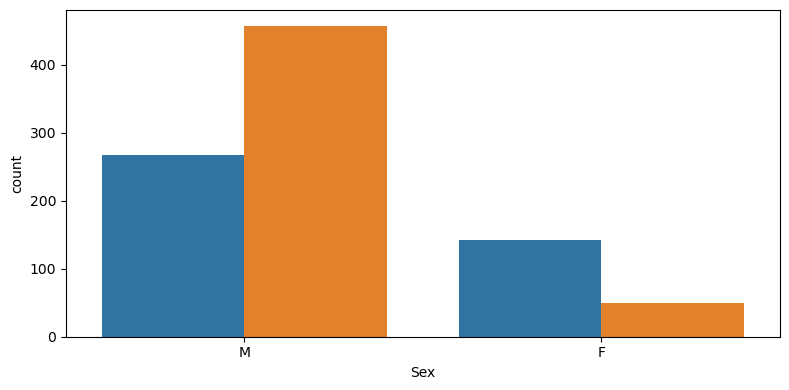

In [16]:
sns.countplot(data = df_original, x = "Sex", hue="HeartDisease")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

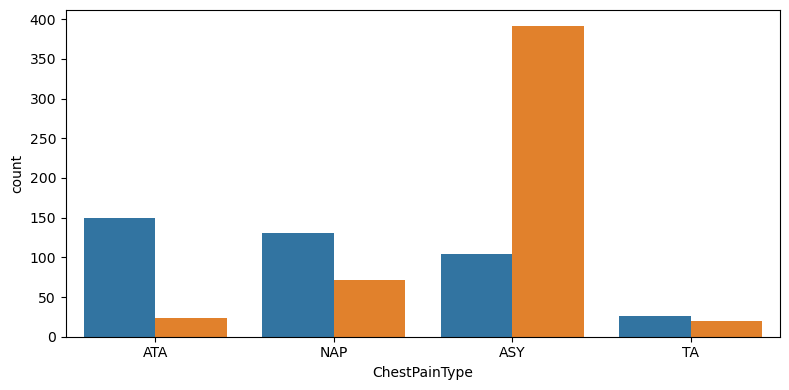

In [17]:
sns.countplot(data=df_original, x="ChestPainType",hue="HeartDisease")

In [18]:
df_original['Sex'] = df_original['Sex'].astype('category')
df_original['ChestPainType'] = df_original['ChestPainType'].astype('category')
df_original['RestingECG'] = df_original['RestingECG'].astype('category')
df_original['ExerciseAngina'] = df_original['ExerciseAngina'].astype('category')
df_original['ST_Slope'] = df_original['ST_Slope'].astype('category')
df_original['FastingBS'] = df_original['FastingBS'].astype('category')
#Convertendo as variaveis do tipo object para category

In [19]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


In [20]:
variaveis_numericas = []
for i in df_original.columns[0:11].tolist():
    if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':
        variaveis_numericas.append(i)
#carregando variaveis para plot

In [23]:
variaveis_numericas

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [24]:
len(variaveis_numericas)

5

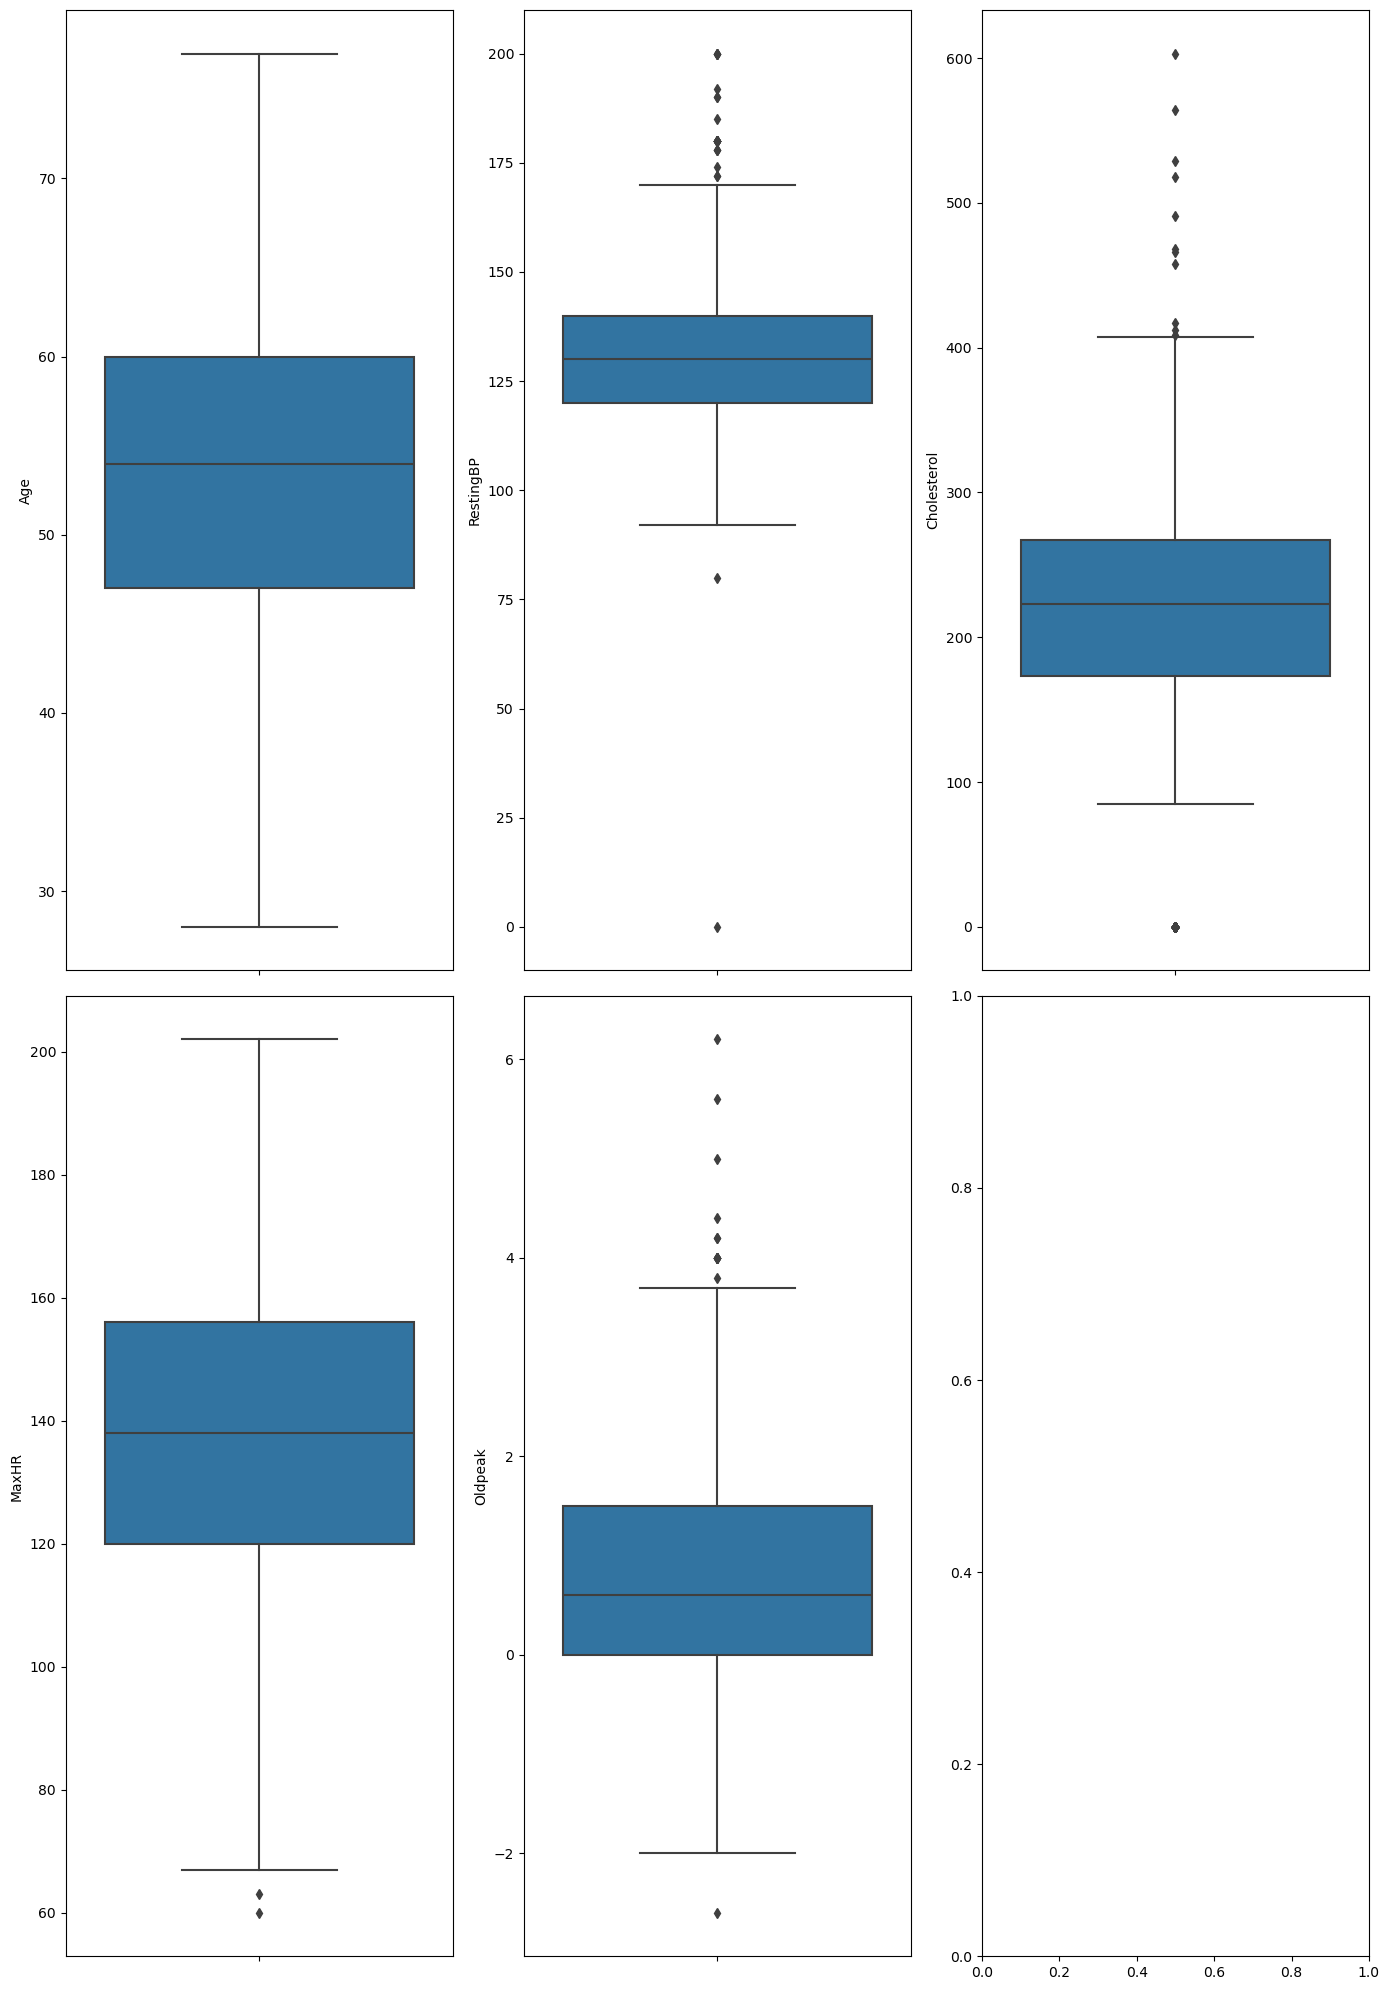

In [25]:
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2,3)# 2 linhas e 3 colunas
linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data=df_original, y=i,ax=axes[linha][coluna])
    coluna +=1
    if coluna == 3:
        linha += 1
        coluna = 0
plt.show()


In [26]:
variaveis_categoricas = []
for i in df_original.columns[0:11].tolist():
    if df_original.dtypes[i] == 'object' or df_original.dtypes[i] == 'category':
        variaveis_categoricas.append(i)
#carregando variaveis para plot

In [27]:
variaveis_categoricas

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [28]:
# Criando o encoder e aplicando OneHotEnconder

lb = LabelEncoder()
for var in variaveis_categoricas:
    df_original[var] = lb.fit_transform(df_original[var])

In [29]:
df_original.isnull().sum()#verificando novamente para confirmar se apos a transofrmação surgiu algum valor nulo

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [31]:
df_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


In [32]:
# Visualizando a quantidade de variavel target para o balanceamento
variavel_tagert = df_original.HeartDisease.value_counts()
variavel_tagert

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [33]:
#Separar variaveis preditoras e target
PREDITORAS = df_original.iloc[:,0:11]#slice
TARGET = df_original.iloc[:,11]#slice

In [34]:
PREDITORAS.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2


In [35]:
TARGET.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [36]:


seed = 100#Seed para reproduzir o mesmo resultado
balanceador = SMOTE(random_state = seed)#Cria um balanceador SMOTE
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS,TARGET)#Aplica o balanceador

<Axes: title={'center': 'Doença Cardiaca'}, xlabel='HeartDisease'>

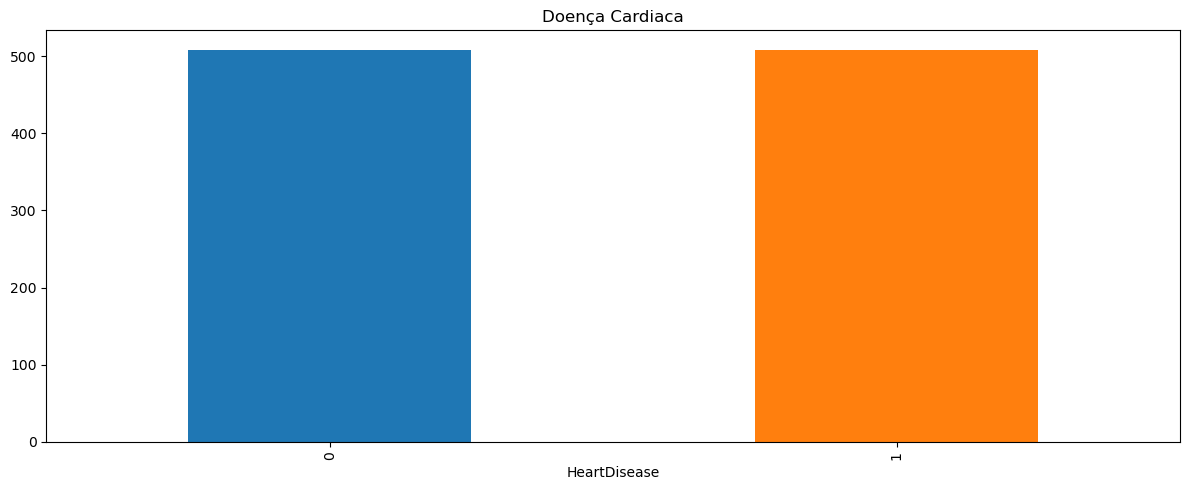

In [37]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar',title='Doença Cardiaca',color = ['#1F77B4','#FF7F0E'])

In [38]:
# vISUALIZANDO A QUANTIDADE DA VARIAVEL TARGET PARA BALANCEAMENTO
variavel_tagert = TARGET_RES.value_counts()
variavel_tagert

HeartDisease
0    508
1    508
Name: count, dtype: int64

Esta balanceado

In [39]:
# Divisão em dados de Treino e Teste
X_train,X_test,Y_train,Y_test = train_test_split(PREDITORAS_RES, TARGET_RES, test_size=0.3,random_state=42)


In [40]:
X_train.shape

(711, 11)

In [41]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
177,59,1,1,140,287,0,1,150,0,0.00,2
467,63,0,1,132,0,0,1,130,0,0.10,2
507,40,1,2,106,240,0,1,80,1,0.00,2
486,55,1,1,110,214,1,2,180,0,0.40,2
328,52,1,0,95,0,1,1,82,1,0.80,1


In [43]:
#Normalização das Variaveis
from sklearn.preprocessing import minmax_scale


Normalizador = MinMaxScaler()
X_train_normal = Normalizador.fit_transform(X_train)
X_test_normal = Normalizador.fit_transform(X_test)

In [44]:
X_train_normal.shape

(711, 11)

Criando, Treinando e Avaliando os Modelos de Machine Learning

In [46]:
# Criando um classificador com Random Forest

clf = RandomForestClassifier(n_estimators=300, criterion='entropy',max_depth=10,
                             max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_jobs=8)
#contrução do modelo
clf = clf.fit(X_train_normal,Y_train)

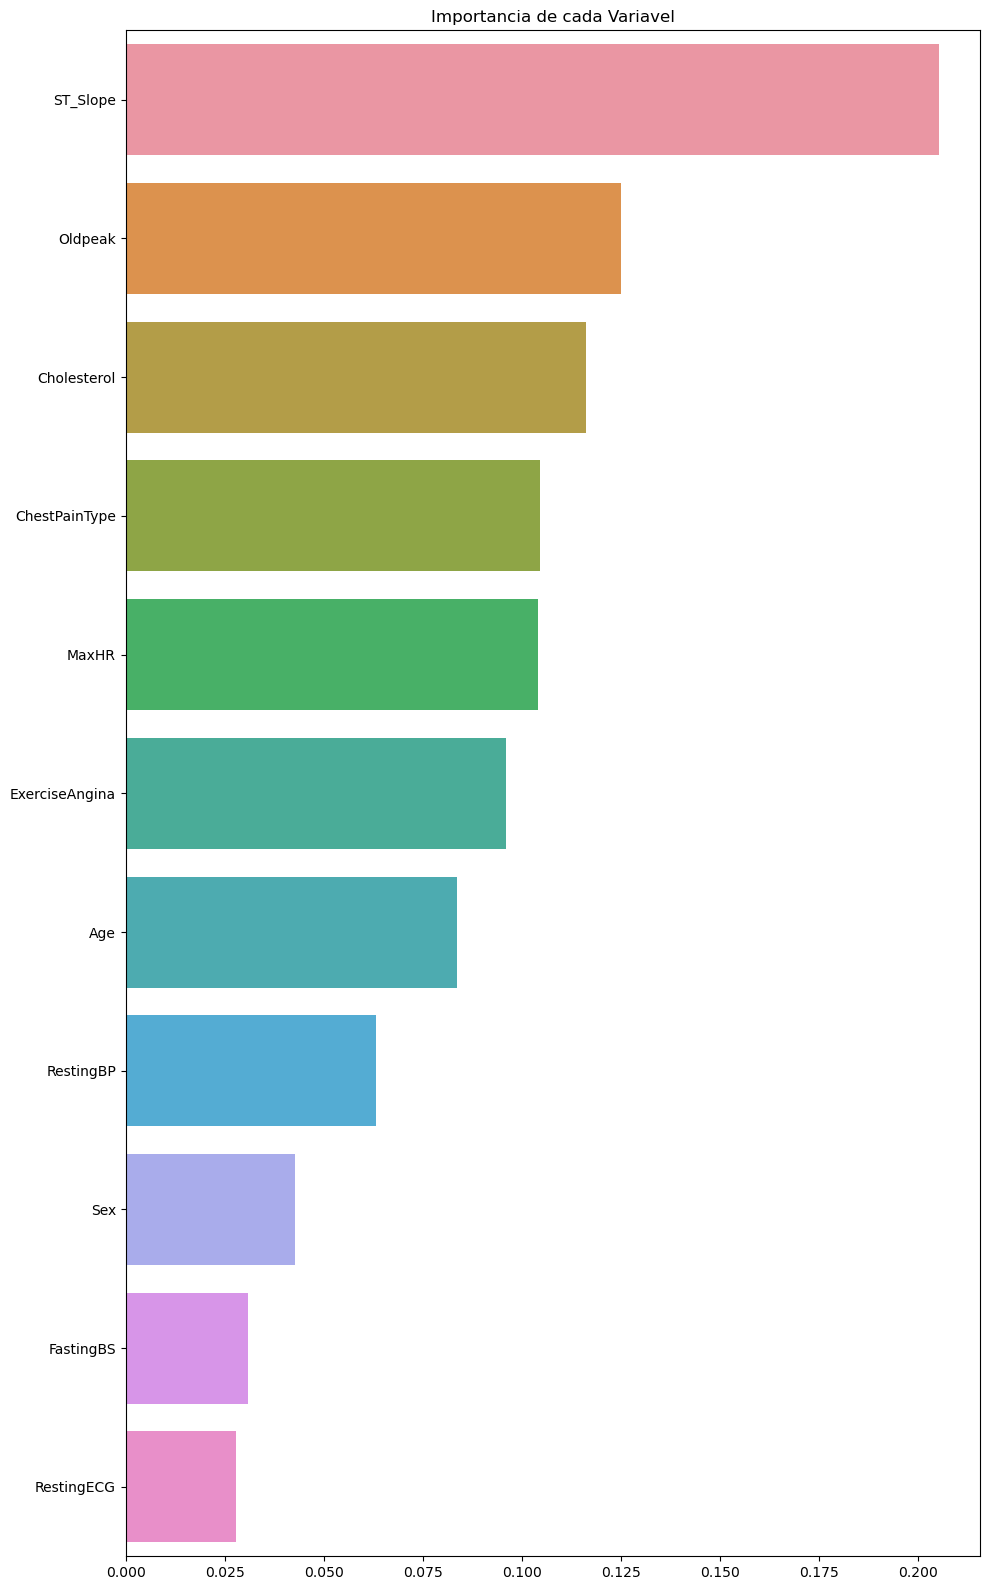

In [47]:
#Exibindo a importancia de cada variavel no modelo preditivo

plt.rcParams["figure.figsize"] = [10.00,16.00]
plt.rcParams["figure.autolayout"]= True

importances = pd.Series(data = clf.feature_importances_, index= PREDITORAS.columns)#feature_importances_ é do proprio random forest, ele pega as variaveis que tem mais peso no modelo
importances = importances.sort_values(ascending=False)

sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importancia de cada Variavel')
plt.show()

In [48]:
#Visualizando o percentual de importancia de cada variavel
importances.sort_values(ascending=False)

ST_Slope         0.21
Oldpeak          0.13
Cholesterol      0.12
ChestPainType    0.10
MaxHR            0.10
ExerciseAngina   0.10
Age              0.08
RestingBP        0.06
Sex              0.04
FastingBS        0.03
RestingECG       0.03
dtype: float64

In [49]:
scores = clf.score(X_train_normal,Y_train)
scores

0.9648382559774965

In [50]:
scores = clf.score(X_test_normal,Y_test)
scores

0.8360655737704918